## Bike Sharing Assignment

### Problem Statement

    A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
    A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.So, it has decided to come up with a mindful business plan to be able to accelerate its revenue.
    In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

    Essentially,the company wants to know-
    
       -  Which variables are significant in predicting the demand for shared bikes.
       -  How well those variables describe the bike demands


## Step 1: Reading and Understanding the data

In [1]:
#To supress the warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the libraries needed

import numpy as np
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt

In [3]:
#Read the csv file containing the data
Bike_Sharing=pd.read_csv("day.csv")
Bike_Sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspect the various aspects of the dataframe

In [4]:
Bike_Sharing.shape

(730, 16)

In [5]:
Bike_Sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There is no missing value/null values in both the columns and rows

In [6]:
# Checking for duplicates and dropping the entire duplicate row if any
Bike_Sharing.drop_duplicates(subset=None, inplace=True)

In [7]:
Bike_Sharing.shape

(730, 16)

There are no duplicate values.

In [8]:
Bike_Sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
column=Bike_Sharing.columns
column

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
for col in column:
    print(Bike_Sharing[col].value_counts())

730    1
251    1
249    1
248    1
247    1
      ..
485    1
484    1
483    1
482    1
1      1
Name: instant, Length: 730, dtype: int64
10-07-2019    1
03-06-2018    1
01-07-2018    1
27-02-2019    1
04-04-2019    1
             ..
17-08-2018    1
30-08-2018    1
12-04-2018    1
28-01-2018    1
21-09-2018    1
Name: dteday, Length: 730, dtype: int64
3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    365
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64
1    504
0    226
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     

There are no unknown/garbage values in the data

In [11]:
#Functions to map the month and year,weekday,weather,season
def mnth_map(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'
    })



def season_map(x):
    return x.map({
        1:'spring',
        2:'summer',
        3:'fall',
        4:'winter',
     })

def yr_map(x):
    return x.map({
        0:2018,
        1:2019,
     })

def weekday_map(x):
    return x.map({
        0:'Sun',
        1:'Mon',
        2:'Tues',
        3:'Wednes',
        4:'Thurs',
        5:'Fri',
        6:'Sat'
     })

def weathersit_map(x):
    return x.map({
        1:'clear',
        2:'mist',
        3:'light_snow',
        4:'heavy_rain',
      })




In [12]:
# Mapping the categorical column numerical value to their corresponding text values
Bike_Sharing[['mnth']] = Bike_Sharing[['mnth']].apply(mnth_map)
Bike_Sharing[['weathersit']] = Bike_Sharing[['weathersit']].apply(weathersit_map)
Bike_Sharing[['weekday']] = Bike_Sharing[['weekday']].apply(weekday_map)
Bike_Sharing[['season']] = Bike_Sharing[['season']].apply(season_map)
Bike_Sharing[['yr']] = Bike_Sharing[['yr']].apply(yr_map)


In [13]:
Bike_Sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,Mon,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Tues,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Wednes,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2:Visualising the data

### Visualising the numerical data

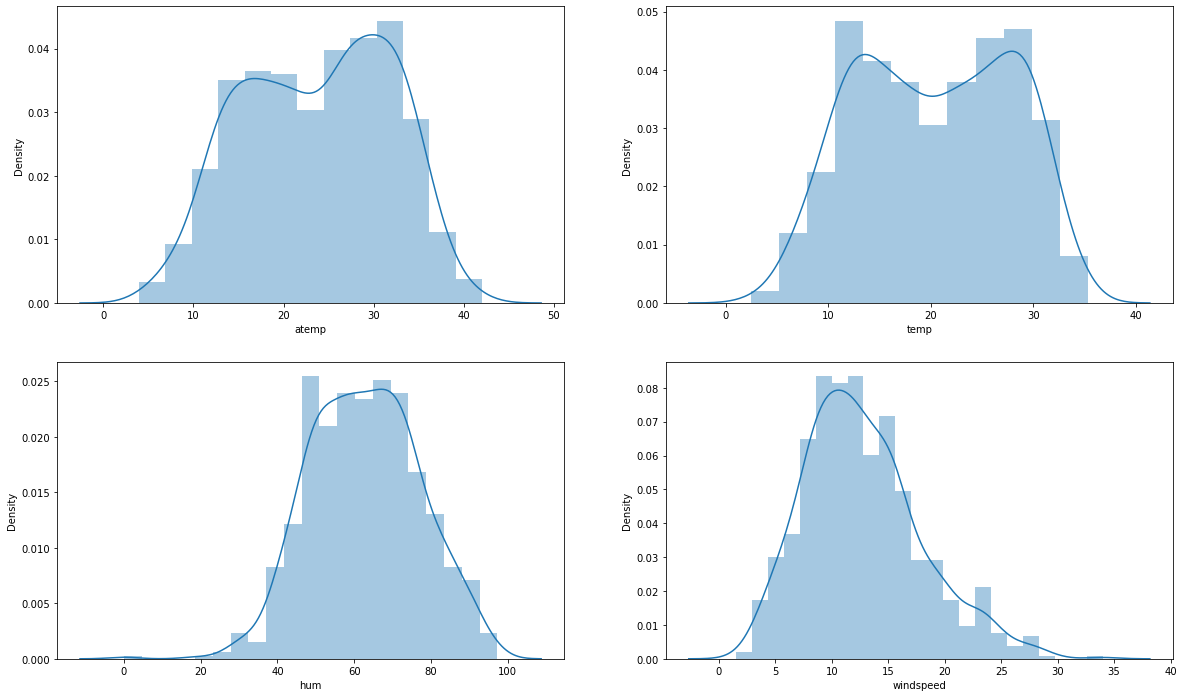

In [14]:
#Plot the dist plot for  the numerical variables
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)
sns.distplot(Bike_Sharing['atemp'])
plt.subplot(2,2,2)
sns.distplot(Bike_Sharing['temp'])
plt.subplot(2,2,3)
sns.distplot(Bike_Sharing['hum'])
plt.subplot(2,2,4)
sns.distplot(Bike_Sharing['windspeed'])


plt.show()

- The temp value peaks at around 15 and 28 C .Similarly even the atemp follows the same pattern except it feels 1-2 C slightly higher than the temp.
- The hum and windspeed follows a normal distribution peaks around 50-70 and 10 respectively.The hum is left skewed while the windspeed is right skewed.

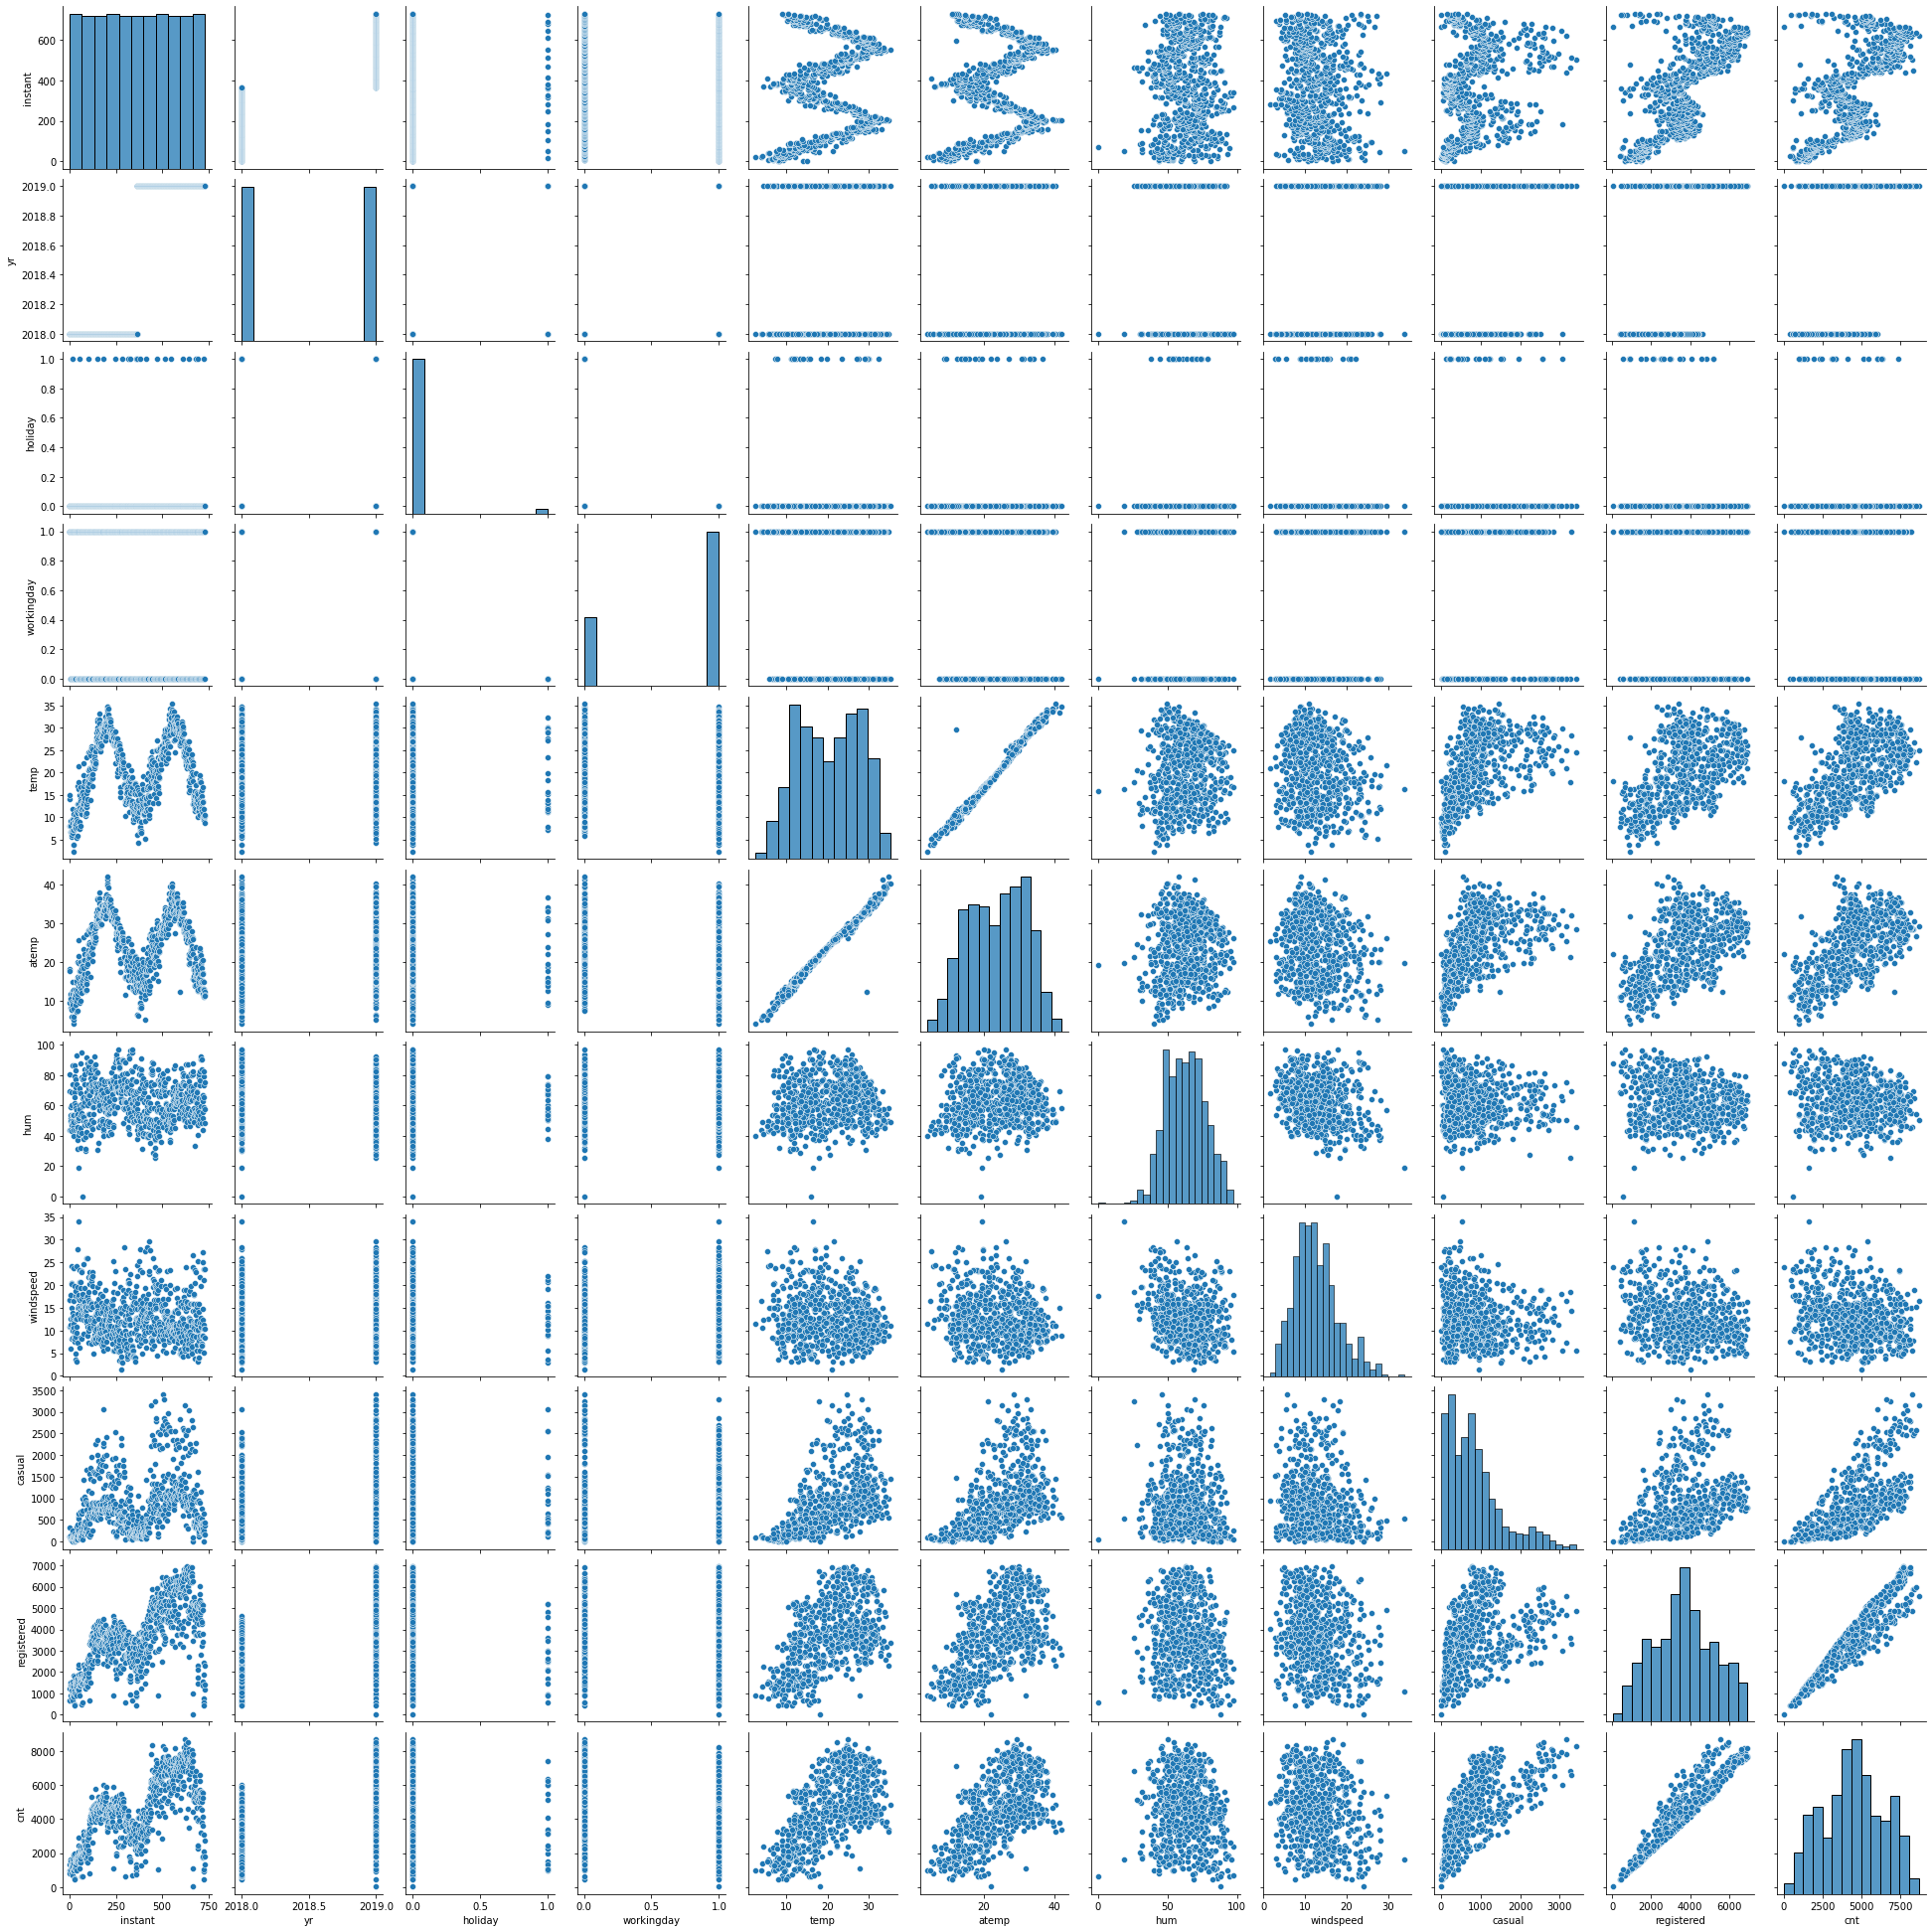

In [15]:
#Pairplot for all the numeric variables
sns.pairplot(Bike_Sharing)
plt.show()

From the above pair plot we can infer the following:
   -  The overall count for the bike sharing has increased for the year 2019 when compared to 2018.
   -  The count of bike rented for the weekend is slightly higher compared to weekdays.
   -  When the weather is Clear/ Partly cloudy, Mist + Cloudy there are more users for the rental of bikes compared to when the weather has light snow/rain.
    And they entirely avoid renting bike when there is heavy rain which seems logical.When the weather is pleasant there are more rentals for the bike
   - Not much can be inferred from the above plot for temp,atemp windspeed,hum as they are randomly scattered.
   - There is a linear correlation between the count and the registered columns
   - The temperature is high June July August

### Visualising the Categorical variable data



In [16]:
Bike_Sharing["dteday"][0]

'01-01-2018'

In [17]:
#Find the number of days since the first day of the rental bike given in the dataset
Bike_Sharing["No_of_days"]=(pd.to_datetime(Bike_Sharing["dteday"],format='%d-%m-%Y')-pd.to_datetime(Bike_Sharing["dteday"][0],format='%d-%m-%Y')).dt.days

In [18]:
Bike_Sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,No_of_days
0,1,01-01-2018,spring,2018,Jan,0,Mon,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,spring,2018,Jan,0,Tues,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,spring,2018,Jan,0,Wednes,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,spring,2018,Jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,spring,2018,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


### Removing the unwanted columns

The following columns are not needed for the further analysis.Hence we will proceed dropping those columns
- instant: record index .This column is like an index value only.Hence we need not take it for furrther analysis
- dteday : date.This column has the date.But there are other columns in the dataset providing the year and the month details.Also we have calculated the field No_of_Days susing this column


In [19]:
#Drop the unwanted columns
Bike_Sharing.drop(["instant","dteday"],axis=1,inplace=True)

In [20]:
Bike_Sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,No_of_days
0,spring,2018,Jan,0,Mon,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,spring,2018,Jan,0,Tues,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,spring,2018,Jan,0,Wednes,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,spring,2018,Jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,spring,2018,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


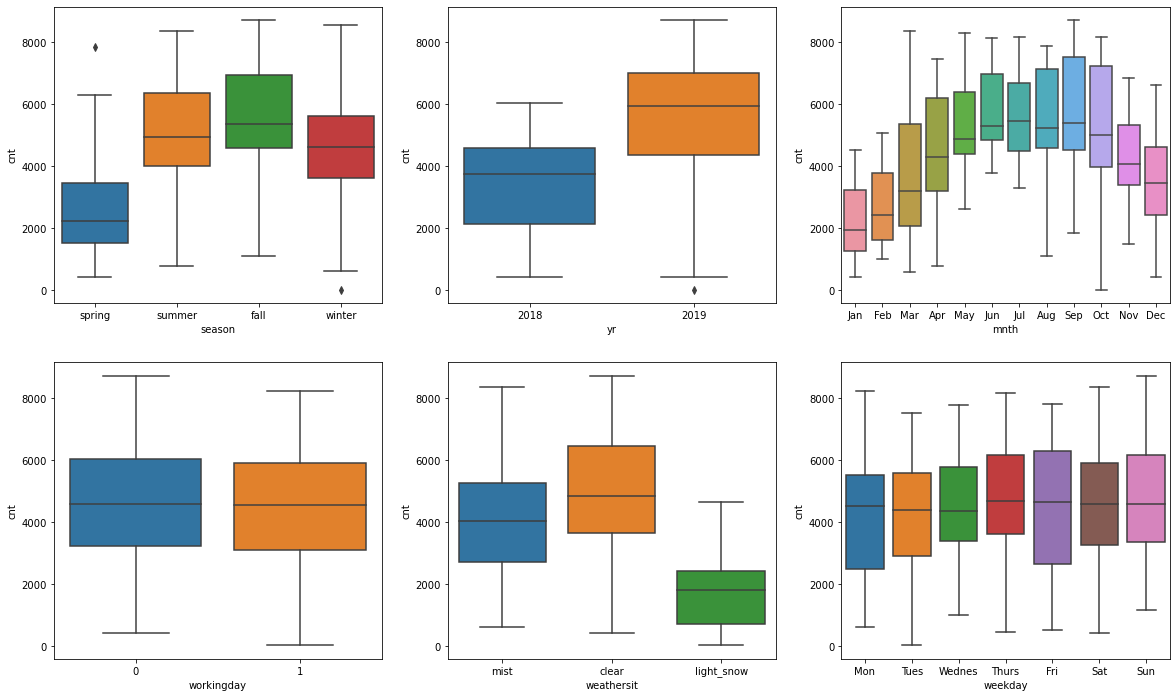

In [21]:
#Boxplot to find any outliers
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_Sharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike_Sharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike_Sharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_Sharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_Sharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_Sharing)
plt.show()

From the above boxplot we can infer the following:

    - There are no outliers in the dataset.
    
    - From the season subplot we acn infer that the demand for rental bike is high during fall followed by summer and winter and the lowest demand is during the spring.
    
    - There is not much difference for demand during the working day or not.Also the demand is same all the days of the week.
    
    - The demand for the rental bike has significantly increased for the year 2019 when compared to 2018.
    
    - The months from June to September has an increased demand for the rental bikes while january and February has the lowest demand.
    
    - The demand for bike is high when the weather is clear /misty .It is lower when there is light rain /light snow.And there is not much demand when the weather is having heavy rainfall

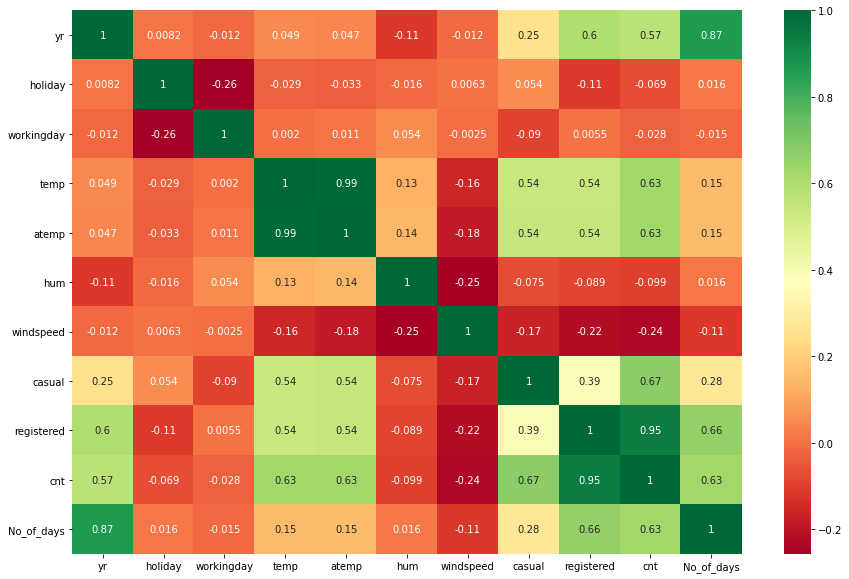

In [22]:
#Plot the correlation between the differnt varaibles using the heatmap
res=Bike_Sharing.corr()
plt.figure(figsize=[15,10])
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

From the above we infer that :
- There is a high positive correlation between the temp and atemp ,year and the No_of_days variables,registered and cnt.(value above 0.8)
- There is negative correlation between the cnt and the windspeed variable.And holiday and working day as expected.And also the cnt and hum,cnt and holiday/working day
are negatively correlated.

In [23]:
#Drop the columns(any one) having high correlation (>0.8)
#Among registered and cnt will drop registered,temp and  atemp drop atemp,No_of_days and yr will drop No_of_days
Bike_Sharing.drop(["registered","atemp","No_of_days"],axis=1,inplace=True)

## Step 3:Data Preparation

### Dummy variables

The variables season,mnth,weekday,weathersit,yr are having multiple levels.We need to convert these to integers .Hence we will be using the dummy variables.

In [24]:
Bike_Sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt
0,spring,2018,Jan,0,Mon,1,mist,14.110847,80.5833,10.749882,331,985
1,spring,2018,Jan,0,Tues,1,mist,14.902598,69.6087,16.652113,131,801
2,spring,2018,Jan,0,Wednes,1,clear,8.050924,43.7273,16.636703,120,1349
3,spring,2018,Jan,0,Thurs,1,clear,8.200000,59.0435,10.739832,108,1562
4,spring,2018,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,82,1600


In [25]:
#Get the dummy variables for the variable season,mnth,weekday,weathersit,yr
variables=["season","mnth","weekday","weathersit","yr"]
for var in variables:
    status = pd.get_dummies(Bike_Sharing[var],prefix=var,drop_first=True)
    Bike_Sharing=pd.concat([Bike_Sharing,status],axis=1)
Bike_Sharing.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wednes,weathersit_light_snow,weathersit_mist,yr_2019
0,spring,2018,Jan,0,Mon,1,mist,14.110847,80.5833,10.749882,...,0,1,0,0,0,0,0,0,1,0
1,spring,2018,Jan,0,Tues,1,mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,1,0,0,1,0
2,spring,2018,Jan,0,Wednes,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,0,0,0
3,spring,2018,Jan,0,Thurs,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,1,0,0,0,0,0
4,spring,2018,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [26]:
Bike_Sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues',
       'weekday_Wednes', 'weathersit_light_snow', 'weathersit_mist',
       'yr_2019'],
      dtype='object')

In [27]:
#dropping the original varaibles after creating the dummy varaibles
Bike_Sharing.drop(variables,axis=1,inplace=True)

In [28]:
Bike_Sharing.head()

,holiday,workingday,temp,hum,windspeed,casual,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wednes,weathersit_light_snow,weathersit_mist,yr_2019
0,0,1,14.110847,80.5833,10.749882,331,985,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,14.902598,69.6087,16.652113,131,801,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,8.050924,43.7273,16.636703,120,1349,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,8.200000,59.0435,10.739832,108,1562,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,82,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training set and Testing sets

In [29]:
# Import the libraries needed for the Regression
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [30]:
df_train,df_test=train_test_split(Bike_Sharing,train_size=0.7,test_size=0.3,random_state=100)

In [31]:
df_train.shape

(510, 30)

In [32]:
df_test.shape

(219, 30)

 ## Rescaling the Features

In [33]:
df_train.head()

,holiday,workingday,temp,hum,windspeed,casual,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wednes,weathersit_light_snow,weathersit_mist,yr_2019
653,0,1,19.201653,55.8333,12.208807,922,7534,0,0,1,...,0,0,0,0,0,0,1,0,0,1
576,0,1,29.246653,70.4167,11.083475,968,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,1
426,0,0,16.980847,62.1250,10.792293,956,4066,1,0,0,...,0,0,0,1,0,0,0,0,1,1
728,0,1,10.489153,48.3333,23.500518,364,1796,1,0,0,...,0,1,0,0,0,0,0,0,0,1
482,0,0,15.443347,48.9583,8.708325,1120,4220,0,1,0,...,0,0,0,1,0,0,0,0,1,1


It is seen that except for temp,hum,windspeed,cnt,casual all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

In [34]:
#Using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [35]:
#Apply the scaler() to the variables  temp,atemp,hum,windspeed,cnt,casual
num_vars=["temp","hum","windspeed","casual","cnt"]
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [36]:
df_train.head()

,holiday,workingday,temp,hum,windspeed,casual,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wednes,weathersit_light_snow,weathersit_mist,yr_2019
653,0,1,0.509887,0.575354,0.300794,0.280402,0.864243,0,0,1,...,0,0,0,0,0,0,1,0,0,1
576,0,1,0.815169,0.725633,0.264686,0.294422,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,1
426,0,0,0.442393,0.640189,0.255342,0.290765,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,1
728,0,1,0.245101,0.498067,0.663106,0.110332,0.204096,1,0,0,...,0,1,0,0,0,0,0,0,0,1
482,0,0,0.395666,0.504508,0.188475,0.340750,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,1


In [37]:
df_train.describe()

,holiday,workingday,temp,hum,windspeed,casual,cnt,season_spring,season_summer,season_winter,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wednes,weathersit_light_snow,weathersit_mist,yr_2019
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.711765,0.537262,0.650369,0.320768,0.254661,0.513620,0.243137,0.245098,0.24902,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.507843
std,0.157763,0.453386,0.225844,0.145882,0.169797,0.206011,0.224593,0.429398,0.430568,0.43287,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.500429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


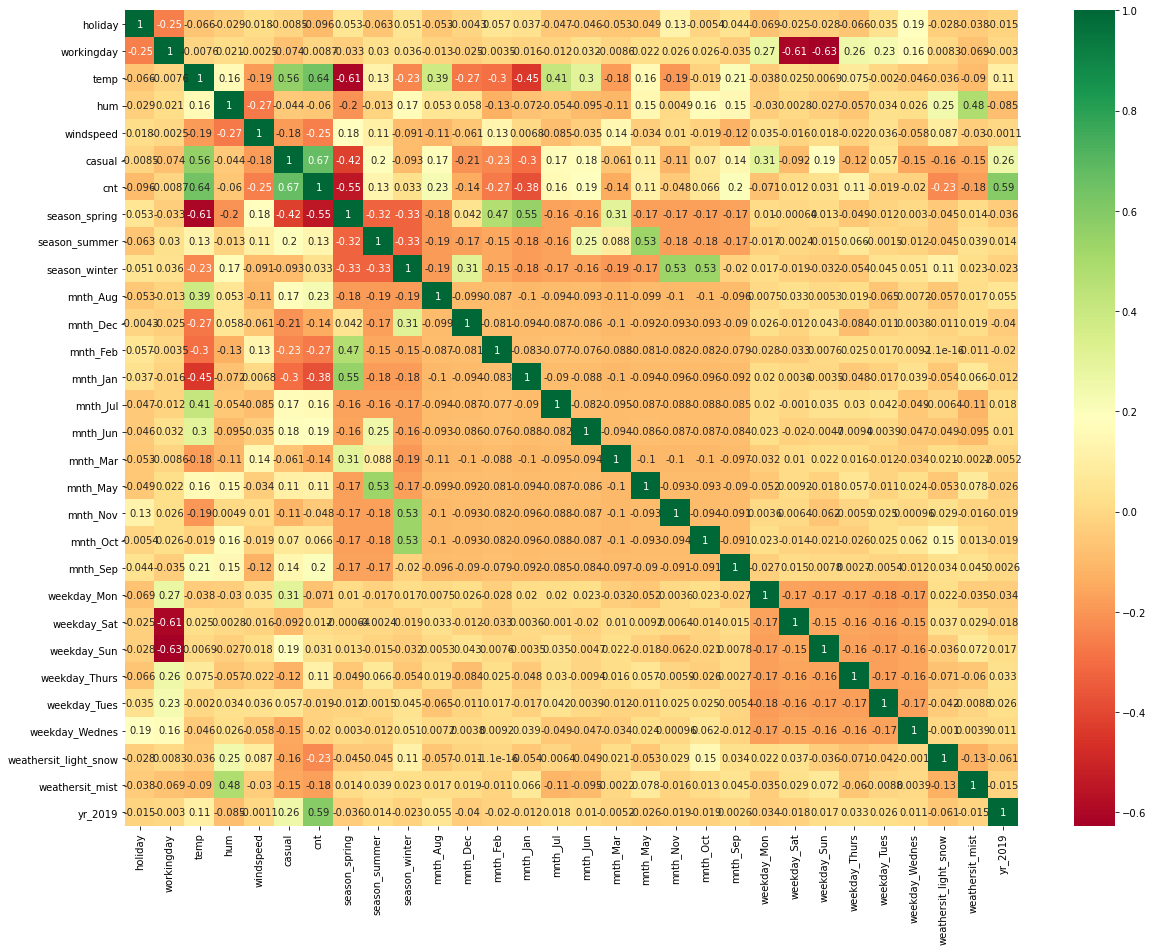

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

From the above heatmap it is observed:
- The workingday is highly negative correlated with weekday_Sat and weekday_Sun
- The cnt is higly positive correlated with the yr_2019 and cnt is correlated with casual
- And the hum and weathersit_mist are postively correlated
- Season_winter is correlated with mnth_Oct,mnth_Nov,Season_summer with mnth_May,Season_spring with mnth_Jan,mnth_Feb
- The cnt is negatively correlated with the season_spring


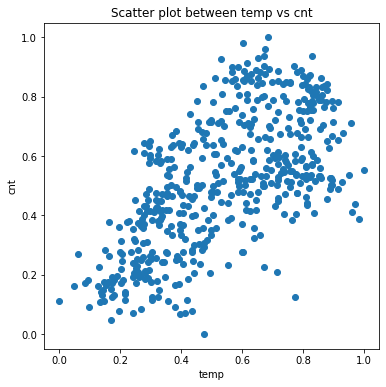

In [39]:
#temp seems to be correlated with the cnt variable .
# plot scatter plot between the temp and cnt
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title("Scatter plot between temp vs cnt")
plt.xlabel("temp")
plt.ylabel("cnt")
plt.show()

### Dividing into X and Y sets for the model building

In [40]:
y_train=df_train.pop("cnt")
X_train=df_train

## Step 5: Building a Linear Regression model

In [41]:
#Using RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
#Building a linear regression model
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

The R2_score for the variable count with 20 variables and 15 variables are same (approximately 89).Hence taking lower 15 count

In [43]:
#running the RFE with the output variable number to 15
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 9),
 ('mnth_Feb', False, 10),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 3),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 8),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 11),
 ('weekday_Sun', True, 1),
 ('weekday_Thurs', False, 5),
 ('weekday_Tues', True, 1),
 ('weekday_Wednes', False, 14),
 ('weathersit_light_snow', True, 1),
 ('weathersit_mist', True, 1),
 ('yr_2019', True, 1)]

In [45]:
#Seperating the selected columns to col variable
col=X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'casual', 'season_spring',
       'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Mon', 'weekday_Sun',
       'weekday_Tues', 'weathersit_light_snow', 'weathersit_mist', 'yr_2019'],
      dtype='object')

In [46]:
#displaying the not selected columns
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Sat', 'weekday_Thurs', 'weekday_Wednes'],
      dtype='object')

## Building a model using the statsmodel for detailed statistics

### Model 1:Build the model using all the variables from the RFE

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [48]:
# Adding a constant variable
X_train_rfe=sm.add_constant(X_train_rfe)

In [49]:
#Building the linear Regression model using Ordinary least squares method and fitting it
lr_model=sm.OLS(y_train,X_train_rfe)
lm1=lr_model.fit()

In [50]:
lm1.params

const                    0.310378
holiday                 -0.127541
temp                     0.316961
hum                     -0.111284
windspeed               -0.108615
casual                   0.387052
season_spring           -0.075515
season_winter            0.066991
mnth_Jul                -0.043897
mnth_Sep                 0.056062
weekday_Mon             -0.118079
weekday_Sun             -0.057985
weekday_Tues            -0.064454
weathersit_light_snow   -0.195861
weathersit_mist         -0.040628
yr_2019                  0.199251
dtype: float64

In [51]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     266.0
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          2.46e-225
Time:                        16:43:07   Log-Likelihood:                 600.96
No. Observations:                 510   AIC:                            -1170.
Df Residuals:                     494   BIC:                            -1102.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3104      0.026     11.868      0.000       0.259       0.362
holiday                  -0.1275      0.022     -5.908      0.000      -0.170      -0.085
temp                      0.3170      0.028     11.350      0.000       0.262       0.372
hum                      -0.1113      0.032     -3.503      0.001      -0.174      -0.049
windspeed                -0.1086      0.022     -4.980      0.000      -0.151      -0.066
casual                    0.3871      0.026     14.713      0.000       0.335       0.439
season_spring            -0.0755      0.013     -5.965      0.000      -0.100      -0.051
season_winter             0.0670      0.010      6.474      0.000       0.047       0.087
mnth_Jul                 -0.0439      0.015     -3.009      0.003      -0.073      -0.015
mnth_Sep                  0.0561      0.013      4.320      0.000       0.031       0.082
weekday_Mon              -0.1181      0.012    -10.191      0.000      -0.141      -0.095
weekday_Sun              -0.0580      0.011     -5.192      0.000      -0.080      -0.036
weekday_Tues             -0.0645      0.010     -6.348      0.000      -0.084      -0.045
weathersit_light_snow    -0.1959      0.022     -8.737      0.000      -0.240      -0.152
weathersit_mist          -0.0406      0.009     -4.547      0.000      -0.058      -0.023
yr_2019                   0.1993      0.007     27.927      0.000       0.185       0.213
==============================================================================
Omnibus:                       92.051   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.165
Skew:                          -0.947   Prob(JB):                     3.80e-46
Kurtosis:                       5.501   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#Calculate the VIF for the model 1
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif =vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,60.91
2,temp,3.54
6,season_spring,2.63
5,casual,2.61
3,hum,1.91
7,season_winter,1.78
14,weathersit_mist,1.60
10,weekday_Mon,1.57
8,mnth_Jul,1.34
11,weekday_Sun,1.32


In [53]:
X.columns

Index(['const', 'holiday', 'temp', 'hum', 'windspeed', 'casual',
       'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sun', 'weekday_Tues', 'weathersit_light_snow',
       'weathersit_mist', 'yr_2019'],
      dtype='object')

In [54]:
#drop the No_of_days columns
X_train_1=X_train_rfe.drop(['const'],axis=1)

In [55]:
X_train_1.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'casual', 'season_spring',
       'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Mon', 'weekday_Sun',
       'weekday_Tues', 'weathersit_light_snow', 'weathersit_mist', 'yr_2019'],
      dtype='object')

In [56]:
#Calculate the VIF for the model again after dropping const
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=X_train_1
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif =vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,hum,22.76
1,temp,19.55
4,casual,6.57
3,windspeed,4.21
5,season_spring,2.61
13,weathersit_mist,2.31
14,yr_2019,2.28
6,season_winter,2.10
9,weekday_Mon,1.85
10,weekday_Sun,1.52


The column hum has a VIF of 22.76(>5) .Hence we drop the hum column and build a model again.

### Model 2:Build the model using all the variables after dropping hum

In [57]:
#drop the hum column as the VIF is high
X_train_2=X_train_1.drop(["hum"],axis=1)

In [58]:
#Build the linear regression model
X_train_2=sm.add_constant(X_train_2)
lr_model=sm.OLS(y_train,X_train_2)
lm2=lr_model.fit()

In [59]:
lm2.params

const                    0.250307
holiday                 -0.128180
temp                     0.292701
windspeed               -0.086158
casual                   0.394749
season_spring           -0.077616
season_winter            0.060610
mnth_Jul                -0.037898
mnth_Sep                 0.053668
weekday_Mon             -0.119965
weekday_Sun             -0.057759
weekday_Tues            -0.067654
weathersit_light_snow   -0.225214
weathersit_mist         -0.058107
yr_2019                  0.201272
dtype: float64

In [60]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     277.8
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          6.08e-224
Time:                        16:43:07   Log-Likelihood:                 594.70
No. Observations:                 510   AIC:                            -1159.
Df Residuals:                     495   BIC:                            -1096.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2503      0.020     12.537      0.000       0.211       0.290
holiday                  -0.1282      0.022     -5.871      0.000      -0.171      -0.085
temp                      0.2927      0.027     10.698      0.000       0.239       0.346
windspeed                -0.0862      0.021     -4.087      0.000      -0.128      -0.045
casual                    0.3947      0.027     14.890      0.000       0.343       0.447
season_spring            -0.0776      0.013     -6.070      0.000      -0.103      -0.052
season_winter             0.0606      0.010      5.884      0.000       0.040       0.081
mnth_Jul                 -0.0379      0.015     -2.587      0.010      -0.067      -0.009
mnth_Sep                  0.0537      0.013      4.094      0.000       0.028       0.079
weekday_Mon              -0.1200      0.012    -10.249      0.000      -0.143      -0.097
weekday_Sun              -0.0578      0.011     -5.114      0.000      -0.080      -0.036
weekday_Tues             -0.0677      0.010     -6.615      0.000      -0.088      -0.048
weathersit_light_snow    -0.2252      0.021    -10.710      0.000      -0.267      -0.184
weathersit_mist          -0.0581      0.007     -7.751      0.000      -0.073      -0.043
yr_2019                   0.2013      0.007     27.986      0.000       0.187       0.215
==============================================================================
Omnibus:                       91.443   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.045
Skew:                          -0.944   Prob(JB):                     1.81e-45
Kurtosis:                       5.476   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#Get the VIF for the model 2
vif=pd.DataFrame()
X=X_train_2
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif =vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,34.71
2,temp,3.32
5,season_spring,2.62
4,casual,2.59
6,season_winter,1.73
9,weekday_Mon,1.56
7,mnth_Jul,1.32
10,weekday_Sun,1.32
11,weekday_Tues,1.18
14,yr_2019,1.13


The p value and VIF for all the columns are less.Except for constant the VIF is 34.71(>5).Hence we drop const and build the model again

In [62]:
#Drop the const column
X_train_2=X_train_2.drop(["const"],axis=1)

In [63]:
X_train_2.columns

Index(['holiday', 'temp', 'windspeed', 'casual', 'season_spring',
       'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Mon', 'weekday_Sun',
       'weekday_Tues', 'weathersit_light_snow', 'weathersit_mist', 'yr_2019'],
      dtype='object')

In [64]:
#Get the VIF for the model 2 again after dropping const
vif=pd.DataFrame()
X=X_train_2
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif =vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,temp,8.40
3,casual,6.56
2,windspeed,4.20
13,yr_2019,2.28
8,weekday_Mon,1.83
4,season_spring,1.77
12,weathersit_mist,1.60
9,weekday_Sun,1.52
5,season_winter,1.44
6,mnth_Jul,1.39


## Model:3 Build the model using all the variables after dropping temp

The Vif for temp is 8.40(>0.05) which is high.It implies multi collinearity .There is some other variable which is related to temp.Hence we dont need temp and proceed with dropping the same

In [65]:
X_train_3=X_train_2.drop(["temp"],axis=1)

In [66]:
#Add constant and Build linear regression model
X_train_3=sm.add_constant(X_train_3)
lr_model=sm.OLS(y_train,X_train_3)
lm3=lr_model.fit()

In [67]:
lm3.params

const                    0.418569
holiday                 -0.137783
windspeed               -0.095739
casual                   0.503527
season_spring           -0.156391
season_winter            0.010008
mnth_Jul                 0.020161
mnth_Sep                 0.073364
weekday_Mon             -0.150234
weekday_Sun             -0.078436
weekday_Tues            -0.079994
weathersit_light_snow   -0.213583
weathersit_mist         -0.057623
yr_2019                  0.199792
dtype: float64

In [68]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     236.3
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          7.36e-203
Time:                        16:43:08   Log-Likelihood:                 541.66
No. Observations:                 510   AIC:                            -1055.
Df Residuals:                     496   BIC:                            -996.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4186      0.014     30.703      0.000       0.392       0.445
holiday                  -0.1378      0.024     -5.698      0.000      -0.185      -0.090
windspeed                -0.0957      0.023     -4.100      0.000      -0.142      -0.050
casual                    0.5035      0.027     18.554      0.000       0.450       0.557
season_spring            -0.1564      0.012    -13.495      0.000      -0.179      -0.134
season_winter             0.0100      0.010      0.987      0.324      -0.010       0.030
mnth_Jul                  0.0202      0.015      1.337      0.182      -0.009       0.050
mnth_Sep                  0.0734      0.014      5.100      0.000       0.045       0.102
weekday_Mon              -0.1502      0.013    -11.932      0.000      -0.175      -0.125
weekday_Sun              -0.0784      0.012     -6.359      0.000      -0.103      -0.054
weekday_Tues             -0.0800      0.011     -7.101      0.000      -0.102      -0.058
weathersit_light_snow    -0.2136      0.023     -9.175      0.000      -0.259      -0.168
weathersit_mist          -0.0576      0.008     -6.935      0.000      -0.074      -0.041
yr_2019                   0.1998      0.008     25.067      0.000       0.184       0.215
==============================================================================
Omnibus:                       58.012   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.024
Skew:                          -0.712   Prob(JB):                     1.91e-22
Kurtosis:                       4.636   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#Get the VIF for the model 3
vif=pd.DataFrame()
X=X_train_3
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif =vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,13.17
3,casual,2.21
4,season_spring,1.75
8,weekday_Mon,1.47
5,season_winter,1.36
9,weekday_Sun,1.28
10,weekday_Tues,1.17
6,mnth_Jul,1.14
13,yr_2019,1.13
2,windspeed,1.11


## Model:4 Build the model using all the variables after dropping season_winter

The season_winter has pvalue of 0.324(>0.05) which is high and coefficient is insignificant

In [70]:
X_train_4=X_train_3.drop(["season_winter"],axis=1)

In [71]:
#Add constant and build the model
X_train_4=sm.add_constant(X_train_4)
lr_model=sm.OLS(y_train,X_train_4)
lm4=lr_model.fit()
                        

In [72]:
lm4.params

const                    0.424717
holiday                 -0.135480
windspeed               -0.098750
casual                   0.495322
season_spring           -0.161632
mnth_Jul                 0.016604
mnth_Sep                 0.072014
weekday_Mon             -0.147882
weekday_Sun             -0.076941
weekday_Tues            -0.078470
weathersit_light_snow   -0.212373
weathersit_mist         -0.058034
yr_2019                  0.200380
dtype: float64

In [73]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     255.9
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          7.31e-204
Time:                        16:43:08   Log-Likelihood:                 541.16
No. Observations:                 510   AIC:                            -1056.
Df Residuals:                     497   BIC:                            -1001.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4247      0.012     35.027      0.000       0.401       0.449
holiday                  -0.1355      0.024     -5.629      0.000      -0.183      -0.088
windspeed                -0.0988      0.023     -4.266      0.000      -0.144      -0.053
casual                    0.4953      0.026     19.174      0.000       0.445       0.546
season_spring            -0.1616      0.010    -15.693      0.000      -0.182      -0.141
mnth_Jul                  0.0166      0.015      1.134      0.257      -0.012       0.045
mnth_Sep                  0.0720      0.014      5.029      0.000       0.044       0.100
weekday_Mon              -0.1479      0.012    -11.962      0.000      -0.172      -0.124
weekday_Sun              -0.0769      0.012     -6.286      0.000      -0.101      -0.053
weekday_Tues             -0.0785      0.011     -7.033      0.000      -0.100      -0.057
weathersit_light_snow    -0.2124      0.023     -9.136      0.000      -0.258      -0.167
weathersit_mist          -0.0580      0.008     -6.993      0.000      -0.074      -0.042
yr_2019                   0.2004      0.008     25.212      0.000       0.185       0.216
==============================================================================
Omnibus:                       56.112   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.372
Skew:                          -0.706   Prob(JB):                     5.30e-21
Kurtosis:                       4.549   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
#Get the VIF for the model 4
vif=pd.DataFrame()
X=X_train_4
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif =vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,10.42
3,casual,2.00
7,weekday_Mon,1.42
4,season_spring,1.38
8,weekday_Sun,1.26
9,weekday_Tues,1.14
12,yr_2019,1.12
11,weathersit_mist,1.10
2,windspeed,1.09
10,weathersit_light_snow,1.09


## Model:5 Build the model using all the variables after dropping mnth_Jul


The p value for the mnth_Jul is high 0.257(>0.05).Hence it becomes insignificant coefficient.Therefore we drop the mnth_July

In [75]:
# Drop the temp column
X_train_5=X_train_4.drop(["mnth_Jul"],axis=1)
X_train_5.columns

Index(['const', 'holiday', 'windspeed', 'casual', 'season_spring', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sun', 'weekday_Tues', 'weathersit_light_snow',
       'weathersit_mist', 'yr_2019'],
      dtype='object')

In [76]:
#Add constant and build the model
X_train_5=sm.add_constant(X_train_5)
lr_model=sm.OLS(y_train,X_train_5)
lm5=lr_model.fit()
                      

In [77]:
lm5.params

const                    0.426729
holiday                 -0.136521
windspeed               -0.100401
casual                   0.497460
season_spring           -0.162943
mnth_Sep                 0.070032
weekday_Mon             -0.147933
weekday_Sun             -0.076515
weekday_Tues            -0.077957
weathersit_light_snow   -0.212319
weathersit_mist         -0.058941
yr_2019                  0.200237
dtype: float64

In [78]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     278.9
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          8.11e-205
Time:                        16:43:08   Log-Likelihood:                 540.51
No. Observations:                 510   AIC:                            -1057.
Df Residuals:                     498   BIC:                            -1006.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4267      0.012     35.566      0.000       0.403       0.450
holiday                  -0.1365      0.024     -5.675      0.000      -0.184      -0.089
windspeed                -0.1004      0.023     -4.345      0.000      -0.146      -0.055
casual                    0.4975      0.026     19.303      0.000       0.447       0.548
season_spring            -0.1629      0.010    -15.916      0.000      -0.183      -0.143
mnth_Sep                  0.0700      0.014      4.926      0.000       0.042       0.098
weekday_Mon              -0.1479      0.012    -11.963      0.000      -0.172      -0.124
weekday_Sun              -0.0765      0.012     -6.252      0.000      -0.101      -0.052
weekday_Tues             -0.0780      0.011     -6.990      0.000      -0.100      -0.056
weathersit_light_snow    -0.2123      0.023     -9.131      0.000      -0.258      -0.167
weathersit_mist          -0.0589      0.008     -7.134      0.000      -0.075      -0.043
yr_2019                   0.2002      0.008     25.190      0.000       0.185       0.216
==============================================================================
Omnibus:                       56.751   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.544
Skew:                          -0.712   Prob(JB):                     2.95e-21
Kurtosis:                       4.556   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
#Get the VIF for the model 5
vif=pd.DataFrame()
X=X_train_5
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif =vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,10.20
3,casual,1.99
6,weekday_Mon,1.42
4,season_spring,1.37
7,weekday_Sun,1.26
8,weekday_Tues,1.14
11,yr_2019,1.12
2,windspeed,1.09
9,weathersit_light_snow,1.09
10,weathersit_mist,1.09


In [80]:
# Drop the const
X_train_5_const=X_train_5.drop(["const"],axis=1)
X_train_5.columns

Index(['const', 'holiday', 'windspeed', 'casual', 'season_spring', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sun', 'weekday_Tues', 'weathersit_light_snow',
       'weathersit_mist', 'yr_2019'],
      dtype='object')

In [81]:
#Get the VIF for the model 5 after dropping const 
vif=pd.DataFrame()
X=X_train_5_const
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif =vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,casual,3.59
1,windspeed,2.92
10,yr_2019,2.23
5,weekday_Mon,1.66
3,season_spring,1.59
6,weekday_Sun,1.45
9,weathersit_mist,1.44
7,weekday_Tues,1.34
4,mnth_Sep,1.14
8,weathersit_light_snow,1.09


### All the p values of the predictor variables are <0.05 (predictors seems to be significant) and the corresponding VIF values(VERY LOW Multicollinearity between the predictors) are also less( < 5) after dropping the constant.
### Hence we proceed with the model 5 for further analysis.

## Step 6:Final Model Interpretation

### Hypothesis testing

Hypothesis testing states:
    
    H0 : B1=B2=B3=......=Bn=0
    H1 : atleast one Bi!=0
    
      

lm5 model coefficients:

Parameter               Coefficients

const                    0.426729

holiday                 -0.136521

windspeed               -0.100401

casual                   0.497460

season_spring           -0.162943

mnth_Sep                 0.070032

weekday_Mon             -0.147933

weekday_Sun             -0.076515

weekday_Tues            -0.077957

weathersit_light_snow   -0.212319

weathersit_mist         -0.058941

yr_2019                  0.200237

From the lm5 model params, it is evident that all our coefficients are not equal to zero, which means we REJECT the NULL HYPOTHESIS


### F:statistics

F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics and lower the prob(F-Statistics), the more significant the Model

F-Statistics : 278.9
Prob (F-statistic): 8.11e-205

The F-Statistics value of 278.9 (which is greater than 1) and the p-value is 8.11e-205 ('~0.0000') states that the overall model is significant

The equation of best fitted surface based on model lm5:
    
    cnt=0.426729-(0.136521* holiday)-(0.100401*windspeed)+(0.497460*casual)-(0.162943*season_spring)+(0.070032*mnth_Sep)-(0.147933*weekday_Mon)-(0.076515*weekday_Sun)-(0.077957*weekday_Tues)-(0.212319*weathersit_light_snow)-(0.058941*weathersit_mist)+(0.200237*yr_2019)
    

### Interpretation of coefficients :

- const : The Constant value of ‘0.426729’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.426729 units.
- holiday:A coefficient value of ‘0.136521’ indicated that a unit increase in holiday variable, decreases the bike hire numbers by 0.136521 units
- windspeed: A coefficient value of ‘0.100401’ indicated that a unit increase in windspeed variable, decreases the bike hire numbers by 0.100401 units
- casual:  A coefficient value of ‘0.497460’ indicated that a unit increase in casual variable, increases the bike hire numbers by 0.497460 units
- season_spring:A coefficient value of ‘0.162943’ indicated that a unit increase in season_spring variable, decreases the bike hire numbers by 0.162943 units
- mnth_Sep: A coefficient value of ‘0.070032’ indicated that a unit increase in mnth_Sep variable, increases the bike hire numbers by 0.070032 units
- weekday_Mon: A coefficient value of ‘0.147933’ indicated that a unit increase in weekday_Mon variable, decreases the bike hire numbers by 0.147933 units
- weekday_Sun:A coefficient value of ‘0.076515’ indicated that a unit increase in weekday_Sun variable, decreases the bike hire numbers by 0.076515 units
- weekday_Tues:A coefficient value of ‘0.077957’ indicated that a unit increase in weekday_Tues variable, decreases the bike hire numbers by 0.077957 units
- weathersit_light_snow:A coefficient value of ‘0.212319’ indicated that a unit increase in weathersit_light_snow variable, decreases the bike hire numbers by 0.212319 units
- weathersit_mist:A coefficient value of ‘0.058941’ indicated that a unit increase in weathersit_mist variable, decreases the bike hire numbers by 0.058941 units
- yr_2019: A coefficient value of ‘0.200237’ indicated that a unit increase in yr_2019 variable, increases the bike hire numbers by 0.200237 units

## Residual Analysis of the train data

In [82]:
X_train_5.columns

Index(['const', 'holiday', 'windspeed', 'casual', 'season_spring', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sun', 'weekday_Tues', 'weathersit_light_snow',
       'weathersit_mist', 'yr_2019'],
      dtype='object')

In [83]:
y_train_cnt=lm5.predict(X_train_5)

## Validating the Assumptions of the Linear Regression model

### The linear regression between X,y

The highest coefficent is of casual for linear regression model .Plotting the value wrt y_train will show the plot be linear

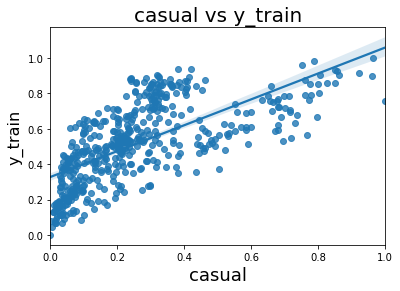

In [84]:
# Plotting casual vs y_train to understand the linearity.
fig = plt.figure()
sns.regplot(X_train_5["casual"],y_train)
plt.title('casual vs y_train', fontsize=20)              # Plot heading 
plt.xlabel('casual', fontsize=18)                          # X-label
plt.ylabel('y_train', fontsize=16)  
plt.show()

### The error terms are normally distributed with mean 0

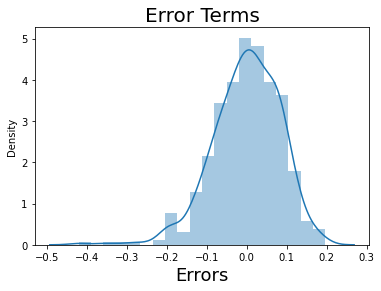

In [85]:
# The error terms are normally distributed with mean 0 -Plot the same using distplot
sns.distplot((y_train-y_train_cnt),bins=20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

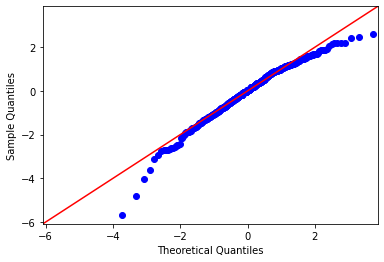

In [86]:
#Error Terms are normally distributed using Q-Qplot
import scipy.stats as stats
res = lm5.resid # residuals
fig = sm.qqplot(res,stats.t, fit=True,line="45")
plt.show()

From the above histogram and the q-q plot, we could see that the Residuals/Error Terms are normally distributed. Hence our assumption for Linear Regression is valid.

### The error terms are independent of each other

Text(0, 0.5, 'residual')

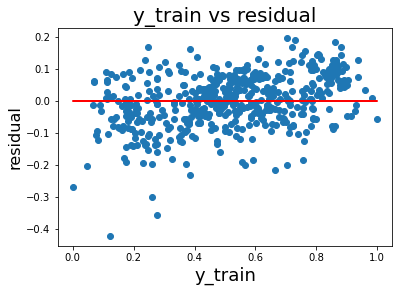

In [87]:
# Plotting y_train and residual to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train-y_train_cnt)
plt.plot(y_train,(y_train - y_train), '-r')
plt.title('y_train vs residual', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('residual', fontsize=16)  

There is no visible pattern seen in the scatter plot above.Hence the residual are independent of each other

### Homoscedasticity

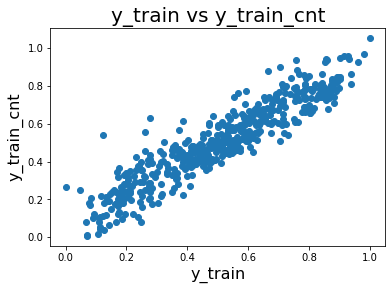

In [88]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_cnt)
plt.title('y_train vs y_train_cnt', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=16)                          # X-label
plt.ylabel('y_train_cnt', fontsize=16)   
plt.show()

And also there is Homoscedasticity since the residuals are distributed in a ranges(constant variance)


### Multicollinearity doesnot exist

In [89]:
#Get the VIF for the model 5 after dropping const 
vif=pd.DataFrame()
X=X_train_5_const
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif =vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,casual,3.59
1,windspeed,2.92
10,yr_2019,2.23
5,weekday_Mon,1.66
3,season_spring,1.59
6,weekday_Sun,1.45
9,weathersit_mist,1.44
7,weekday_Tues,1.34
4,mnth_Sep,1.14
8,weathersit_light_snow,1.09


The VIF <5 for all the predictors which proves that there is no multicollinearity.

## Making Predictions

### Applying the scaling on the test sets

In [90]:
#Apply the scaler() to the variables  temp,hum,windspeed,cnt,casual
num_vars=["temp","hum","windspeed","casual","cnt"]
df_test[num_vars]=scaler.transform(df_test[num_vars])

### Dividing X_test and y_test

In [91]:
y_test=df_test.pop("cnt")
X_test=df_test

In [92]:
X_train_5_const.columns

Index(['holiday', 'windspeed', 'casual', 'season_spring', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sun', 'weekday_Tues', 'weathersit_light_snow',
       'weathersit_mist', 'yr_2019'],
      dtype='object')

In [93]:
# Proceed with the predictions
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_5_const.columns]
#Adding a constant
X_test_new=sm.add_constant(X_test_new)

In [94]:
#Making prediction using lm6 (model 6)
y_pred=lm5.predict(X_test_new)

In [95]:
from sklearn.metrics import r2_score
r2=round(r2_score(y_test,y_pred),4)
r2

0.8474

In [96]:
# n is number of rows in test dataset
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.8385

### R2 value

Training set-86%
Testing set -84.74%

### Adjusted R2 Value

Training set-85.7%
Testing set -83.85%


Since the R2 value and Adjusted R2 value are high .It is a good model.

In [97]:
#Calculate root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0851

The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values.The RMSE value is 0.0851.  Lower values of RMSE indicate better fit.

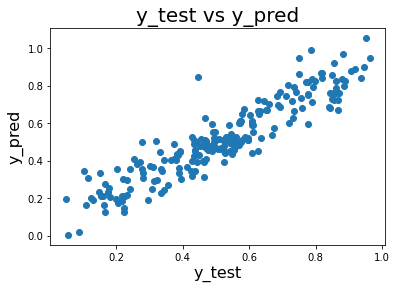

In [98]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_pred', fontsize=16)   
plt.show()

## Final Report

- The equation of best fitted surface based on linear regression model :

<b> cnt=0.426729-(0.136521* holiday)-(0.100401*windspeed)+(0.497460*casual)-(0.162943*season_spring)+(0.070032*mnth_Sep)-(0.147933*weekday_Mon)-(0.076515*weekday_Sun)-(0.077957*weekday_Tues)-(0.212319*weathersit_light_snow)-(0.058941*weathersit_mist)+(0.200237*yr_2019) </b>

- From the above equation we can see that the top 3 features that contribute significantly are:


<b>Casual</b> 0.49746

 A coefficient value of ‘0.497460’ indicated that a unit increase in casual variable, increases the bike hire numbers by 0.497460 units

<b>weathersit_light_snow</b>	-0.212319

A coefficient value of ‘-0.212319’ indicated that a unit increase in weathersit_light_snow variable, decreases the bike hire numbers by 0.212319 units

<b>yr_2019</b>	0.200237


 A coefficient value of ‘0.200237’ indicated that a unit increase in yr_2019 variable, increases the bike hire numbers by 0.200237 units

It is better to consider the above features while planning to achieve the maximum booking.

The next best features to consider are :

- season_spring
- weekday_Mon


<b>The R2 value is
Training set-86% Testing set -84.74%</b>

<b>The Adjusted R2 value
Training set-85.7% Testing set -83.85%</b>

Since the R2 value and Adjusted R2 value are high .It is a good model.